# U.S. Medical Insurance Costs

In [23]:
import csv
all_data = []

with open("insurance.csv", newline="") as insurance_file:
    insurance_file = csv.DictReader(insurance_file)

    for row in insurance_file:
        all_data.append(row)

# 1. How much does a person pay by their region and sex?

In [24]:
def analyze_region_sex(dataset):
    # Initialize a dictionary to store averages   
    region_sex_avg = {
        'southwest': {'male': 0, 'female': 0},
        'southeast': {'male': 0, 'female': 0},
        'northwest': {'male': 0, 'female': 0},
        'northeast': {'male': 0, 'female': 0}
    }

    # Initialize counters
    counts = {
        'southwest': {'male': 0, 'female': 0},
        'southeast': {'male': 0, 'female': 0},
        'northwest': {'male': 0, 'female': 0},
        'northeast': {'male': 0, 'female': 0}       
    }

    # Sum up charges for each region/sex
    for person in dataset:
        region = person["region"]
        sex = person["sex"]
        charges = float(person["charges"])

        region_sex_avg[region][sex] += charges
        counts[region][sex] += 1

    # Calculate averages
    for region in region_sex_avg.keys():
        for sex in region_sex_avg[region].keys():
            if counts[region][sex] > 0:
                region_sex_avg[region][sex] /= counts[region][sex]
    
    return region_sex_avg

averages = analyze_region_sex(all_data)

print("Average Insurance Charges by Region and Sex:")
print("--------------------------------------------")

for region, values in averages.items():
    print(f"{region}:")
    print(f" Male: {values["male"]:.2f}$")
    print(f" Female: {values["female"]:.2f}$")

Average Insurance Charges by Region and Sex:
--------------------------------------------
southwest:
 Male: 13412.88$
 Female: 11274.41$
southeast:
 Male: 15879.62$
 Female: 13499.67$
northwest:
 Male: 12354.12$
 Female: 12479.87$
northeast:
 Male: 13854.01$
 Female: 12953.20$


# 2. What percentage of the total population finds itself in each age category?
### Child: 0-10 years old
### Young: 11-25 years old
### Adult: 26-65 years old
### Elder: 66-120 years old

In [25]:
def cat_percetange(dataset):
    #category = input("For which category do you want to calculate the percentage? (Child/Young/Adult/Elder)")
    total_population = 0
    category_dict = {
        "Child": 0,
        "Young": 0,
        "Adult": 0,
        "Elder": 0
    }
    for person in dataset:
        total_population += 1
        age = int(person["age"])
        if age <= 10:
            category_dict["Child"] += 1
        elif age <= 25:
            category_dict["Young"] += 1
        elif age <= 65:
            category_dict["Adult"] += 1
        else:
            category_dict["Elder"] += 1 

    category_percentages = {
        "Child": (category_dict["Child"]/total_population) * 100,
        "Young": (category_dict["Young"]/total_population) * 100,
        "Adult": (category_dict["Adult"]/total_population) * 100,
        "Elder": (category_dict["Elder"]/total_population) * 100
    }

    for category, percentage in category_percentages.items():
        print(f"Out of {total_population} people in our dataset, {percentage:.2f}% are {category}s.")
    #print(f"Out of {total_population} people in our dataset, {category_percentage:.2f}% are {category}s.")

    return category_percentages

cat_percetange(all_data)

Out of 1338 people in our dataset, 0.00% are Childs.
Out of 1338 people in our dataset, 22.87% are Youngs.
Out of 1338 people in our dataset, 77.13% are Adults.
Out of 1338 people in our dataset, 0.00% are Elders.


{'Child': 0.0,
 'Young': 22.869955156950674,
 'Adult': 77.13004484304933,
 'Elder': 0.0}

# 3. How much do you pay if you are in the Young category and how much do you pay if you are in the Adult category?
### What is the difference in percentage?

In [26]:
def charge_percentage_by_category(dataset):
    charges_young = 0
    charges_adult = 0
    charges_total = 0
    young_count = 0
    adult_count = 0

    for person in dataset:
        age = int(person["age"])
        charge = float(person["charges"])
        charges_total += charge

        if age < 25:
            charges_young += charge
            young_count += 1
        elif age <= 65:
            charges_adult += charge
            adult_count += 1
        else:
            pass

    # Calculate percentages of total
    pay_young_percent = (charges_young / charges_total) * 100
    pay_adult_percent = (charges_adult / charges_total) * 100
    
    # Calculate average payments
    avg_young = charges_young / young_count if young_count > 0 else 0
    avg_adult = charges_adult / adult_count if adult_count > 0 else 0
    
    # Calculate difference in dollars (per person)
    diff_dollars = abs(avg_adult - avg_young)
    diff_percent = abs(pay_adult_percent - pay_young_percent)

    results = [charges_total, charges_young, charges_adult, young_count, adult_count, avg_young, avg_adult, pay_adult_percent, pay_young_percent,diff_percent, diff_dollars]

    return results

result_percentage_list = charge_percentage_by_category(all_data)

if result_percentage_list[7] > result_percentage_list[8]:
    print(f"The difference between Adult and Young people in terms of paying medical insurance is: {result_percentage_list[9]:.2f}%, Adults paying more by {result_percentage_list[10]:.2f}$.")
else:
    print(f"The difference between Adult and Young people in terms of paying medical insurance is: {result_percentage_list[9]:.2f}%, Youngsters paying more by {result_percentage_list[10]:.2f}$.")
           

print(f"The percentage of population that is Young and pays charges is {result_percentage_list[8]:.2f}% out of a total of {result_percentage_list[0]:.2f}$.")
print(f"The percentage of population that is Adult and pays charges is {result_percentage_list[7]:.2f}% out of a total of {result_percentage_list[0]:.2f}$.")

The difference between Adult and Young people in terms of paying medical insurance is: 71.78%, Adults paying more by 5376.09$.
The percentage of population that is Young and pays charges is 14.11% out of a total of 17755824.99$.
The percentage of population that is Adult and pays charges is 85.89% out of a total of 17755824.99$.


# 4. Having children in the Young age category how much does it add up to the charges in percentage?

In [27]:
def child_charges(dataset):
    result_list = charge_percentage_by_category(dataset)
    
    charges_young = result_list[1]
    young_count = result_list[3]
    
    charges_young0 = 0
    charges_young1 = 0
    charges_young2 = 0
    charges_young3 = 0
    charges_young_more = 0
    young_count0 = 0
    young_count1 = 0
    young_count2 = 0
    young_count3 = 0
    young_count_more = 0
    
    for person in dataset:
        age = int(person["age"])
        kids = int(person["children"])
        charge = float(person["charges"])
        
        if age <= 25:
            if kids == 0:
                charges_young0 += charge
                young_count0 += 1
            elif kids == 1:
                charges_young1 += charge
                young_count1 += 1
            elif kids == 2:
                charges_young2 += charge
                young_count2 += 1
            elif kids == 3:
                charges_young3 += charge
                young_count3 += 1
            elif kids >= 4:
                charges_young_more += charge
                young_count_more += 1   

    # Calculate percentages
    young_0_kids = (charges_young0 / charges_young) * 100 if charges_young > 0 else 0
    young_1_kids = (charges_young1 / charges_young) * 100 if charges_young > 0 else 0
    young_2_kids = (charges_young2 / charges_young) * 100 if charges_young > 0 else 0
    young_3_kids = (charges_young3 / charges_young) * 100 if charges_young > 0 else 0
    young_more_kids = (charges_young_more / charges_young) * 100 if charges_young > 0 else 0
    
    # Calculate average costs per person
    avg_cost0 = charges_young0 / young_count0 if young_count0 > 0 else 0
    avg_cost1 = charges_young1 / young_count1 if young_count1 > 0 else 0
    avg_cost2 = charges_young2 / young_count2 if young_count2 > 0 else 0
    avg_cost3 = charges_young3 / young_count3 if young_count3 > 0 else 0
    avg_cost_more = charges_young_more / young_count_more if young_count_more > 0 else 0
    
    # Create the return list
    young_kids_list = [
        young_count0, young_count1, young_count2, young_count3, young_count_more,
        young_0_kids, young_1_kids, young_2_kids, young_3_kids, young_more_kids,
        young_count, charges_young, 
        charges_young0, charges_young1, charges_young2, charges_young3, charges_young_more,
        avg_cost0, avg_cost1, avg_cost2, avg_cost3, avg_cost_more
    ]
    
    return young_kids_list

young_with_kids = child_charges(all_data)

print(f"There are {young_with_kids[0]} young people with 0 kid(s) that pay {young_with_kids[5]:.2f}% of young people charges, which is ${young_with_kids[12]:.2f} total (avg: ${young_with_kids[17]:.2f} per person).")
print(f"There are {young_with_kids[1]} young people with 1 kid(s) that pay {young_with_kids[6]:.2f}% of young people charges, which is ${young_with_kids[13]:.2f} total (avg: ${young_with_kids[18]:.2f} per person).")
print(f"There are {young_with_kids[2]} young people with 2 kid(s) that pay {young_with_kids[7]:.2f}% of young people charges, which is ${young_with_kids[14]:.2f} total (avg: ${young_with_kids[19]:.2f} per person).")
print(f"There are {young_with_kids[3]} young people with 3 kid(s) that pay {young_with_kids[8]:.2f}% of young people charges, which is ${young_with_kids[15]:.2f} total (avg: ${young_with_kids[20]:.2f} per person).")
print(f"There are {young_with_kids[4]} young people with 4 or more kid(s) that pay {young_with_kids[9]:.2f}% of young people charges, which is ${young_with_kids[16]:.2f} total (avg: ${young_with_kids[21]:.2f} per person).")
print(f"Young people are paying a total of ${young_with_kids[11]:.2f}")

There are 200 young people with 0 kid(s) that pay 64.39% of young people charges, which is $1613134.90 total (avg: $8065.67 per person).
There are 48 young people with 1 kid(s) that pay 15.17% of young people charges, which is $380066.50 total (avg: $7918.05 per person).
There are 31 young people with 2 kid(s) that pay 20.15% of young people charges, which is $504757.53 total (avg: $16282.50 per person).
There are 18 young people with 3 kid(s) that pay 8.55% of young people charges, which is $214139.97 total (avg: $11896.66 per person).
There are 9 young people with 4 or more kid(s) that pay 2.74% of young people charges, which is $68527.95 total (avg: $7614.22 per person).
Young people are paying a total of $2505152.61


# 5. Having children and also being a smoker how much does this increase your taxes on average compared to somone who doesn't have kids and is not a smoker?

In [28]:
def smoker_with_children(dataset):
    smoker_kids_dict = {}
    nonsmoker_kid_dict = {}
    tax_total_sk = 0
    tax_total_non_smoker = 0
    for person in dataset:
        kids = int(person["children"])
        smoker = person["smoker"]
        charge = float(person["charges"])
        if kids >= 1 and smoker == "yes":
            tax_total_sk += charge
            if smoker not in smoker_kids_dict:
                smoker_kids_dict[smoker] = []

            smoker_kids_dict[smoker].append(kids)
        
        elif kids == 0 and smoker  == "no":
            tax_total_non_smoker += charge
            if smoker not in nonsmoker_kid_dict:
                nonsmoker_kid_dict[smoker] = tax_total_non_smoker
    
    sum_kids = sum(smoker_kids_dict["yes"])
    total_kids = len(smoker_kids_dict["yes"])
    avg_nr_kids = sum_kids/total_kids if total_kids > 0 else 0

    result_percentage_list = charge_percentage_by_category(dataset)
    total_taxes =  result_percentage_list[0]
    avg_sum_sk = (tax_total_sk/total_taxes) * 100 if total_taxes > 0 else 0
    smoker_with_kids_count = len(smoker_kids_dict["yes"])
    avg_charge_per_smoker_with_kids = tax_total_sk / smoker_with_kids_count
    avg_sum_nonsmoker = (tax_total_non_smoker/total_taxes) * 100
    avg_increrease = abs(avg_sum_sk-avg_sum_nonsmoker) 


    return avg_increrease, smoker_kids_dict, nonsmoker_kid_dict, avg_nr_kids, avg_sum_nonsmoker, avg_sum_sk, avg_charge_per_smoker_with_kids
            
x = smoker_with_children(all_data)

print(f"For smokers having at least one kid, their charges represent {x[5]:.2f}% of the total medical costs,\n"
      f"with an average of {x[3]:.1f} kids per smoker. Compared to nonsmokers with no children, who represent\n"
      f"{x[4]:.2f}% of the total medical costs. The charge difference between these groups is {x[0]:.2f} percentage points.\n"
      f"Smokers with children pay an average of ${x[6]:.2f} per person in medical charges.")

For smokers having at least one kid, their charges represent 29.16% of the total medical costs,
with an average of 1.9 kids per smoker. Compared to nonsmokers with no children, who represent
19.68% of the total medical costs. The charge difference between these groups is 9.48 percentage points.
Smokers with children pay an average of $32562.94 per person in medical charges.


# 6. Organizing findings in Data Structures

In [29]:
# Create a dictionary to store your key findings
insurance_insights = {
    "regional_gender_costs": {
        "southwest": {"male": 13412.88, "female": 11274.41},
        "southeast": {"male": 15879.62, "female": 13499.67},
        "northwest": {"male": 12354.12, "female": 12479.87},
        "northeast": {"male": 13854.01, "female": 12953.20}
    },
    "age_category_breakdown": {
        "Child": 0.0,
        "Young": 22.87,
        "Adult": 77.13, 
        "Elder": 0.0
    },
    "cost_drivers": [
        {"factor": "smoking", "impact_percentage": "high"},
        {"factor": "age", "impact_percentage": "medium"},
        {"factor": "children", "impact_percentage": "medium"},
        {"factor": "region", "impact_percentage": "low"}
    ]
}

# 7. Predicting inluential features
### Calculate correlation coefficients between numeric and features charges using a simple regression approach.
### Ranking features by their impact on costs

In [30]:
import pandas as pd
from scipy.stats import pearsonr

def analyze_feature_importance(dataset):
    df = pd.DataFrame(dataset)
    
    # Convert relevant columns to numeric
    df["age"] = pd.to_numeric(df["age"])
    df["children"] = pd.to_numeric(df["children"])
    df["charges"] = pd.to_numeric(df["charges"])
    
    # Create binary features for categorical variables
    df["is_smoker"] = df["smoker"].apply(lambda x: 1 if x == "yes" else 0)
    df["is_male"] = df["sex"].apply(lambda x: 1 if x == "male" else 0)  # Fixed comparison
    
    # Create region indicator variables  
    df["is_northeast"] = df["region"].apply(lambda x: 1 if x == "northeast" else 0)  # Fixed typo
    df['is_northwest'] = df['region'].apply(lambda x: 1 if x == 'northwest' else 0)
    df['is_southeast'] = df['region'].apply(lambda x: 1 if x == 'southeast' else 0)
    df['is_southwest'] = df['region'].apply(lambda x: 1 if x == 'southwest' else 0)
    
    correlations = {}
    
    # Remove "charges" from this list since it will always have perfect correlation with itself
    for column in ["age", "children", "is_smoker", "is_male",
                  "is_northeast", "is_northwest", "is_southeast", "is_southwest"]:
        corr, _ = pearsonr(df[column], df["charges"])
        correlations[column] = corr
    
    # Sort by absolute correlation value
    sorted_correlations = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)

    return sorted_correlations

feature_importance = analyze_feature_importance(all_data)

print("Features ranked by importance (correlation with insurance charges):")
for feature, correlation in feature_importance:
    print(f"{feature}: {correlation:.4f}")

print("Smoking is overwhelmingly the most important factor affecting insurance costs.")

Features ranked by importance (correlation with insurance charges):
is_smoker: 0.7873
age: 0.2990
is_southeast: 0.0740
children: 0.0680
is_male: 0.0573
is_southwest: -0.0432
is_northwest: -0.0399
is_northeast: 0.0063
Smoking is overwhelmingly the most important factor affecting insurance costs.


# 8. Exploring potential bias in the data

In [31]:
def analyze_potential_bias(dataset):
    bias_findings = {}
    
    region_counts = {}
    region_percentages = {}
    for person in dataset:
        region = person["region"]
        if region not in region_counts:
            region_counts[region] = 0
        region_counts[region] += 1
    
    total = len(dataset)
    for region, count in region_counts.items():
        percentage = (count / total) * 100
        region_percentages[region] = percentage
        
    bias_findings["regional_representation"] = region_percentages
    
    # Check if certain combinations are underrepresented
    # For example, analyze older people who don't smoke
    # Convert age to int before comparison
    older_nonsmokers = sum(1 for person in dataset if int(person["age"]) > 65 and person["smoker"] == "no")
    
    bias_findings["older_nonsmokers_percentage"] = (older_nonsmokers / total) * 100
    
    # For example, analyze young people who smoke
    # Convert age to int before comparison
    young_smokers = sum(1 for person in dataset if int(person["age"]) > 10 and int(person["age"]) <= 25 and person["smoker"] == "yes")
    
    bias_findings["younger_smokers_percentage"] = (young_smokers / total) * 100
    
    # Simple cost comparison by gender
    male_charges = [float(person["charges"]) for person in dataset if person["sex"] == "male"]
    female_charges = [float(person["charges"]) for person in dataset if person["sex"] == "female"]
    
    bias_findings["average_cost"] = {
        "male": sum(male_charges)/len(male_charges) if male_charges else 0,
        "female": sum(female_charges)/len(female_charges) if female_charges else 0
    }
    
    # Missing potentially important factors
    bias_findings["missing_data"] = ["income", "education", "occupation"]
    
    return bias_findings

bias_analysis = analyze_potential_bias(all_data)
print(bias_analysis) 



{'regional_representation': {'southwest': 24.28998505231689, 'southeast': 27.204783258594915, 'northwest': 24.28998505231689, 'northeast': 24.2152466367713}, 'older_nonsmokers_percentage': 0.0, 'younger_smokers_percentage': 4.857997010463378, 'average_cost': {'male': 13956.751177721893, 'female': 12569.578843835347}, 'missing_data': ['income', 'education', 'occupation']}


# 9. Data Visualization for previous findings

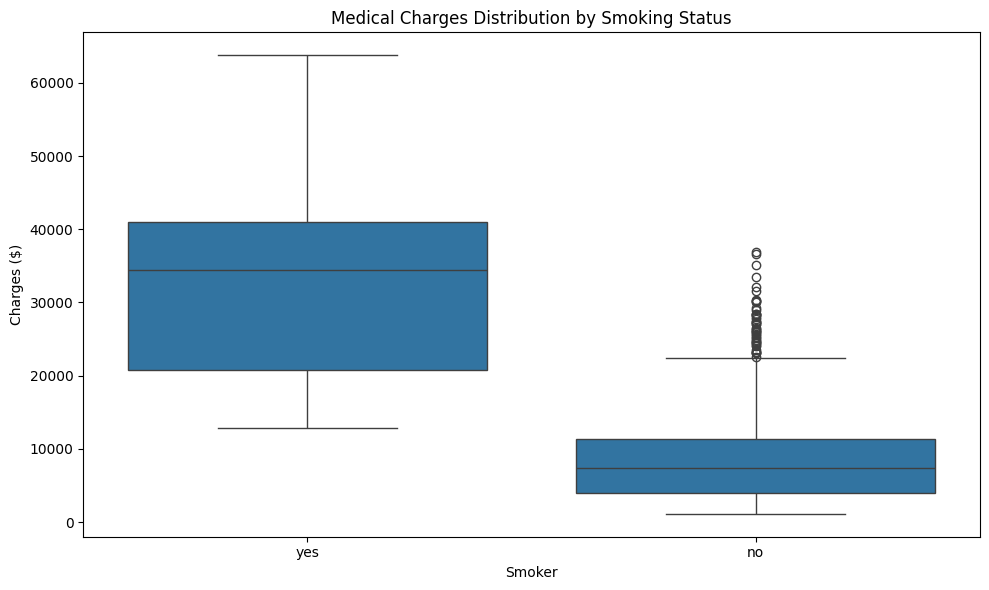

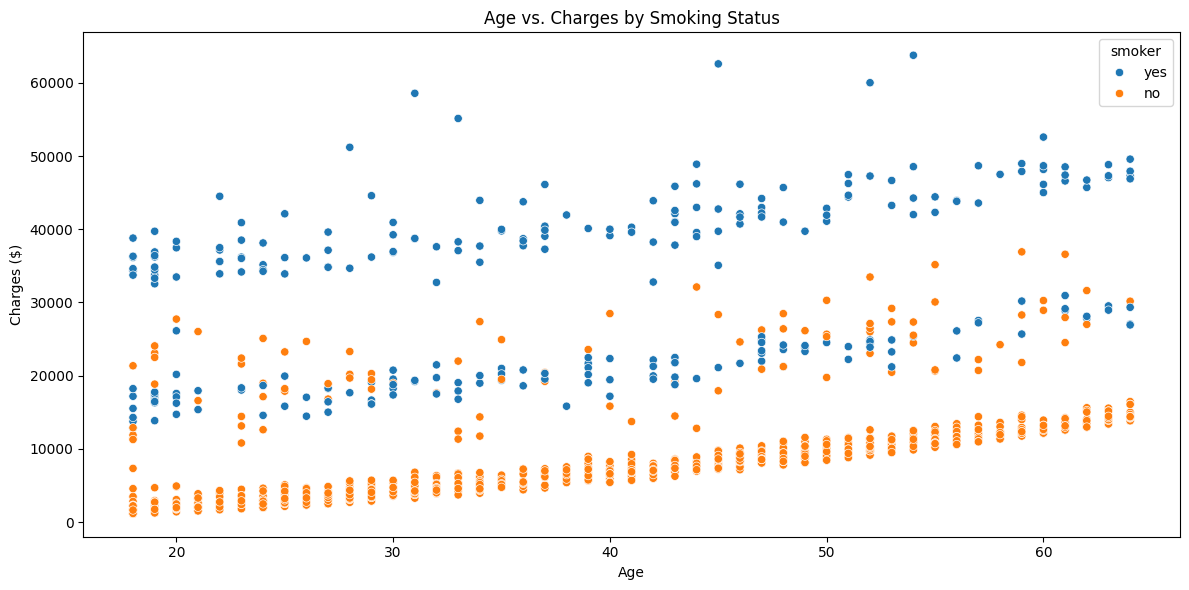

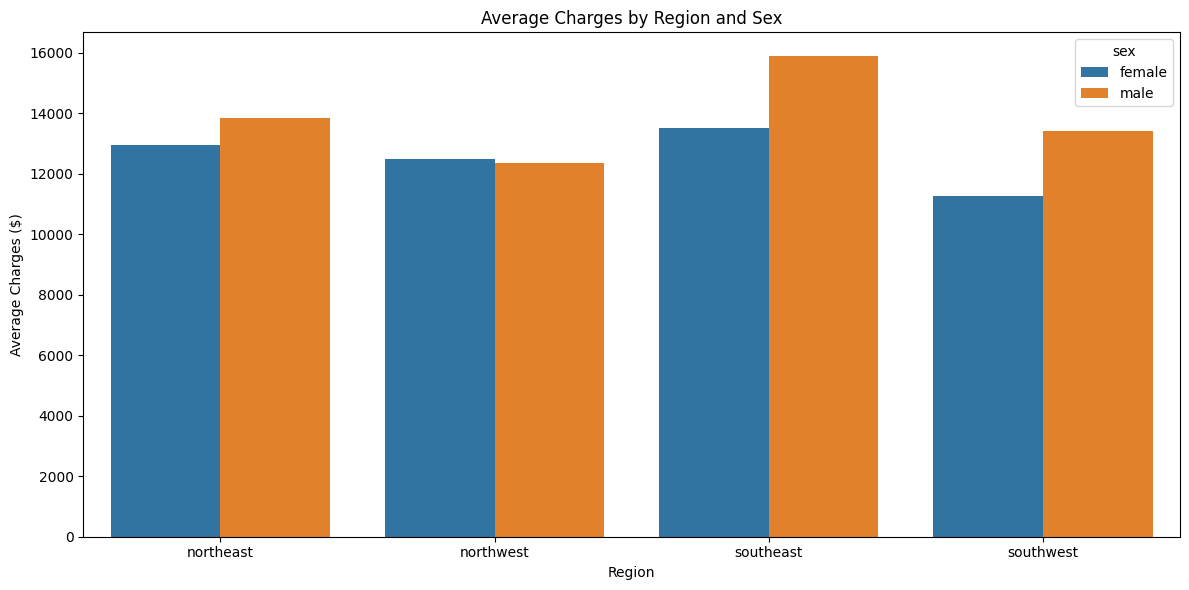

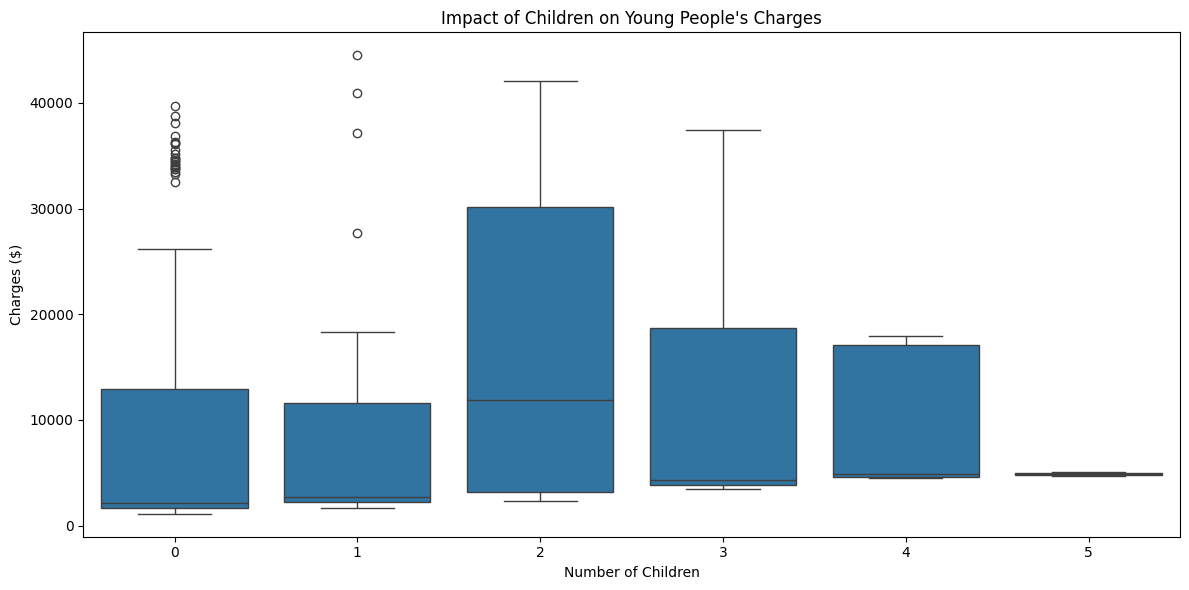

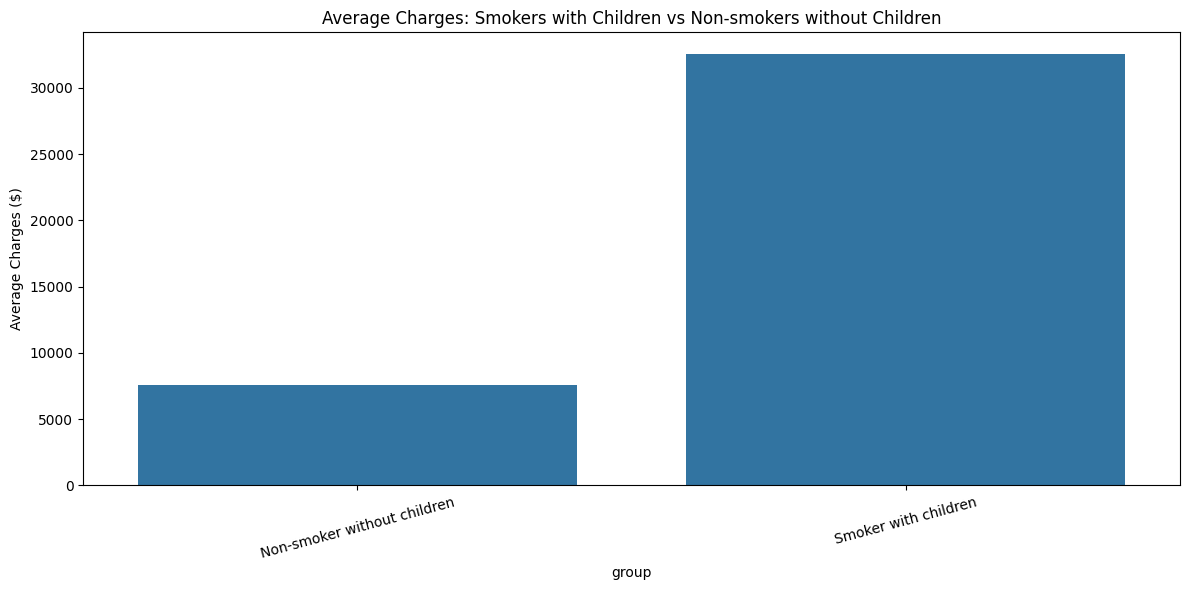

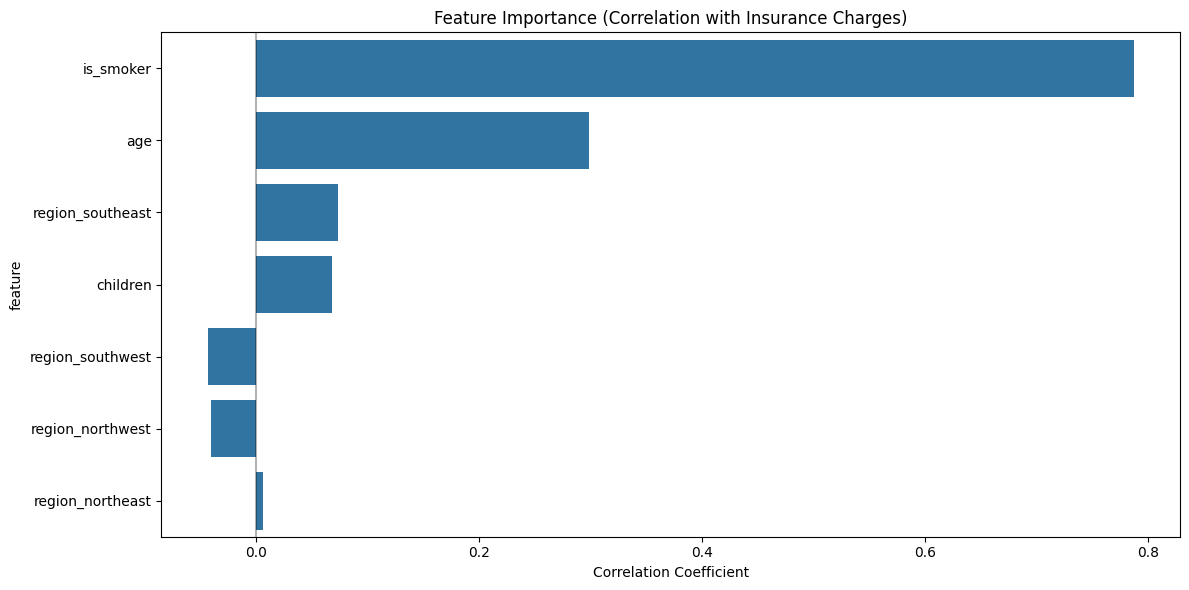

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

def create_visualization(dataset):
    # Convert to DataFrame for easier visualization
    df = pd.DataFrame(dataset)
    
    df["age"] = pd.to_numeric(df["age"])
    df["children"] = pd.to_numeric(df["children"])
    df["charges"] = pd.to_numeric(df["charges"])
    
    # Create new binary feature for smoker status
    df["is_smoker"] = df["smoker"].apply(lambda x: 1 if x == "yes" else 0)
    
    # Create age categories
    df["age_category"] = pd.cut(
        df["age"], 
        bins=[0, 10, 25, 65, 120], 
        labels=["Child", "Young", "Adult", "Elder"]
    )
    
    # 1. Charges by smoker status
    plt.figure(figsize=(10, 6))
    sns.boxplot(x="smoker", y="charges", data=df)
    plt.title("Medical Charges Distribution by Smoking Status")
    plt.ylabel("Charges ($)")
    plt.xlabel("Smoker")
    plt.tight_layout()
    plt.show()
    
    # 2. Age vs. Charges, colored by smoker status
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x="age", y="charges", hue="smoker", data=df)
    plt.title("Age vs. Charges by Smoking Status")
    plt.ylabel("Charges ($)")
    plt.xlabel("Age")
    plt.tight_layout()
    plt.show()
    
    # 3. Region and sex breakdown
    plt.figure(figsize=(12, 6))
    region_sex_charges = df.groupby(["region", "sex"])["charges"].mean().reset_index()
    sns.barplot(x="region", y="charges", hue="sex", data=region_sex_charges)
    plt.title("Average Charges by Region and Sex")
    plt.ylabel("Average Charges ($)")
    plt.xlabel("Region")
    plt.tight_layout()
    plt.show()
    
    
    # 5. Children impact on young people's charges
    plt.figure(figsize=(12, 6))
    young_df = df[df["age_category"] == "Young"]
    sns.boxplot(x="children", y="charges", data=young_df)
    plt.title("Impact of Children on Young People's Charges")
    plt.ylabel("Charges ($)")
    plt.xlabel("Number of Children")
    plt.tight_layout()
    plt.show()
    
    # 6. Smokers with children vs non-smokers without children
    plt.figure(figsize=(12, 6))
    # Create groups
    df["group"] = "Other"
    df.loc[(df["is_smoker"] == 1) & (df["children"] >= 1), "group"] = "Smoker with children"
    df.loc[(df["is_smoker"] == 0) & (df["children"] == 0), "group"] = "Non-smoker without children"
    
    group_charges = df[df["group"] != "Other"].groupby("group")["charges"].mean().reset_index()
    sns.barplot(x="group", y="charges", data=group_charges)
    plt.title("Average Charges: Smokers with Children vs Non-smokers without Children")
    plt.ylabel("Average Charges ($)")
    plt.xticks(rotation=15)
    plt.tight_layout()
    plt.show()
    
    # 7. Feature importance (correlation with charges)
    plt.figure(figsize=(12, 6))
    # Calculate correlations with charges
    corr_data = []
    for col in ["age", "children", "is_smoker"]:
        corr_data.append({"feature": col, "correlation": df[col].corr(df["charges"])})
    
    # Add one-hot encoded features for region
    for region in df["region"].unique():
        region_col = (df["region"] == region).astype(int)
        corr_data.append({"feature": f"region_{region}", "correlation": region_col.corr(df["charges"])})
    
    corr_df = pd.DataFrame(corr_data)
    corr_df["abs_correlation"] = corr_df["correlation"].abs()
    corr_df = corr_df.sort_values("abs_correlation", ascending=False)
    
    # Plot correlation values
    sns.barplot(x="correlation", y="feature", data=corr_df)
    plt.title("Feature Importance (Correlation with Insurance Charges)")
    plt.xlabel("Correlation Coefficient")
    plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    plt.tight_layout()
    plt.show()

create_visualization(all_data)
